In [15]:
import numpy as np # numerical package (linear algebra etc.)
import pylab as pl # plotting
from sklearn.datasets import make_circles, make_blobs

((400, 2), (400,))


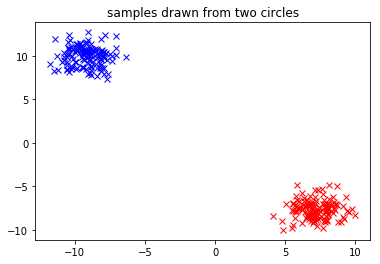

In [16]:
data, labels = make_blobs(n_samples=400)
print(data.shape, labels.shape)

ying = np.array([i for i, label in enumerate(labels) if label == 0])
yang = np.array([i for i, label in enumerate(labels) if label == 1])
data_ying, data_yang = data[ying], data[yang]

pl.title("samples drawn from two circles")
pl.plot(data_ying[:,0], data_ying[:,1], "x", color="blue")
pl.plot(data_yang[:,0], data_yang[:,1], "x", color="red")

((400, 2), (400,))


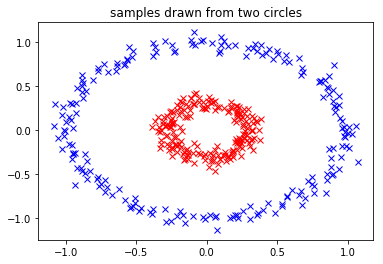

In [17]:
data, labels = make_circles(n_samples=400, factor=0.3, noise=0.05)
print(data.shape, labels.shape)

ying = np.array([i for i, label in enumerate(labels) if label == 0])
yang = np.array([i for i, label in enumerate(labels) if label == 1])
data_ying, data_yang = data[ying], data[yang]

pl.title("samples drawn from two circles")
pl.plot(data_ying[:,0], data_ying[:,1], "x", color="blue")
pl.plot(data_yang[:,0], data_yang[:,1], "x", color="red")

In [18]:
def rbf_kernel(data, gamma):
    """ compute radial basis function kernel """
    
    data_i = np.expand_dims(data, 0)
    data_j = np.expand_dims(data, 1)
    square_dist = np.sum(np.square(data_i-data_j), axis=2)
    
    return np.exp(-gamma*square_dist)

def linear_kernel(data):
    """ trivial kernel """
    
    data_i = np.expand_dims(data, 0)
    data_j = np.expand_dims(data, 1)
    dot_prod = np.sum(data_i*data_j, axis=2)
    
    return dot_prod



In [19]:
def spectral_embedding(kernel, degree, epsilon=1E-8):
    
    # compute laplacian of graph where
    # kernel(i, j) represents the soft adjacency
    # matrix of the graph with weights in [0, 1]
    row_sum = np.maximum(np.sum(kernel, axis=0), 
                         np.zeros(kernel.shape[0])+epsilon)
    rsqrt_diagonal = np.diag(1.0/np.sqrt(row_sum))
    laplacian = (rsqrt_diagonal).dot(kernel).dot(rsqrt_diagonal)
    
    # now compute eigenvalue decomposition
    U, S, V = np.linalg.svd(laplacian)
    
    return U[:,:degree]

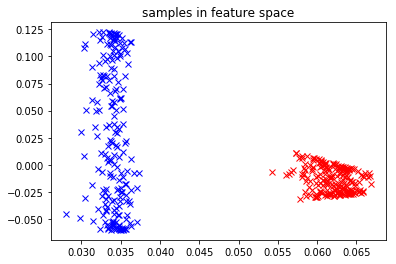

In [20]:
# spectral embedding using radial basis function kernel
kernel = rbf_kernel(data, 5)
embedding = spectral_embedding(kernel, 2)

embedding_ying, embedding_yang = embedding[ying], embedding[yang]

pl.title("samples in feature space")
pl.plot(embedding_ying[:,0], embedding_ying[:,1], "x", color="blue")
pl.plot(embedding_yang[:,0], embedding_yang[:,1], "x", color="red")

In [21]:
def spectral_clustering(kernel, degree):
    """ spectral clustering is kmeans on spectral embedding """
    
    # compute the embedding
    embedding = spectral_embedding(kernel, degree)
    
    from sklearn.cluster import KMeans
    algorithm = KMeans(n_clusters=degree)
    
    return algorithm.fit_predict(embedding)

In [22]:
kernel = rbf_kernel(data, 10)
labels_predicted = spectral_clustering(kernel, 2)
from sklearn.metrics import adjusted_rand_score

# quality of predicted labels
print(adjusted_rand_score(labels, labels_predicted))


1.0


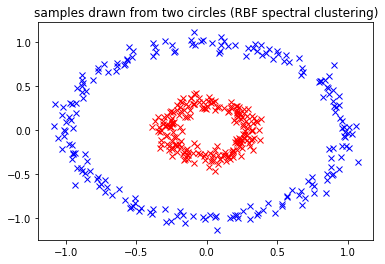

In [23]:
ying_predicted = np.array([i for i, label in enumerate(labels_predicted) if label == 0])
yang_predicted = np.array([i for i, label in enumerate(labels_predicted) if label == 1])
data_ying_predicted, data_yang_predicted = data[ying_predicted], data[yang_predicted]

pl.title("samples drawn from two circles (RBF spectral clustering)")
pl.plot(data_ying_predicted[:,0], data_ying_predicted[:,1], "x", color="blue")
pl.plot(data_yang_predicted[:,0], data_yang_predicted[:,1], "x", color="red")

In [24]:
# using a linear kernel the embedding is the identity
# and thus spectral clustering ordinary KMeans
kernel = linear_kernel(data)
labels_predicted = spectral_clustering(kernel, 2)
from sklearn.metrics import adjusted_rand_score

# quality of predicted labels
print(adjusted_rand_score(labels, labels_predicted))

0.08296025059717084


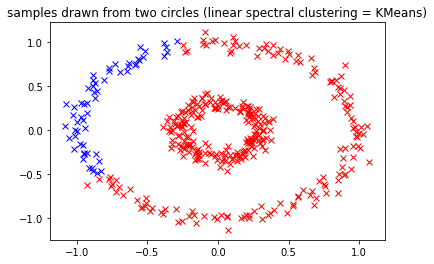

In [25]:
ying_predicted = np.array([i for i, label in enumerate(labels_predicted) if label == 0])
yang_predicted = np.array([i for i, label in enumerate(labels_predicted) if label == 1])
data_ying_predicted, data_yang_predicted = data[ying_predicted], data[yang_predicted]

pl.title("samples drawn from two circles (linear spectral clustering = KMeans)")
pl.plot(data_ying_predicted[:,0], data_ying_predicted[:,1], "x", color="blue")
pl.plot(data_yang_predicted[:,0], data_yang_predicted[:,1], "x", color="red")